In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [52]:
combined_df = pd.read_csv("../data/derived/medals.csv")

country_total_medals_year = combined_df.groupby(['country_3_letter_code', 'game_year']).size().reset_index(name='total_medals')

pivot_df = country_total_medals_year.pivot(index='game_year', columns='country_3_letter_code', values='total_medals')

total_medals_by_country = pivot_df.sum()

In [53]:
top_countries = total_medals_by_country.nlargest(5)
top_countries_df = pivot_df[top_countries.index]

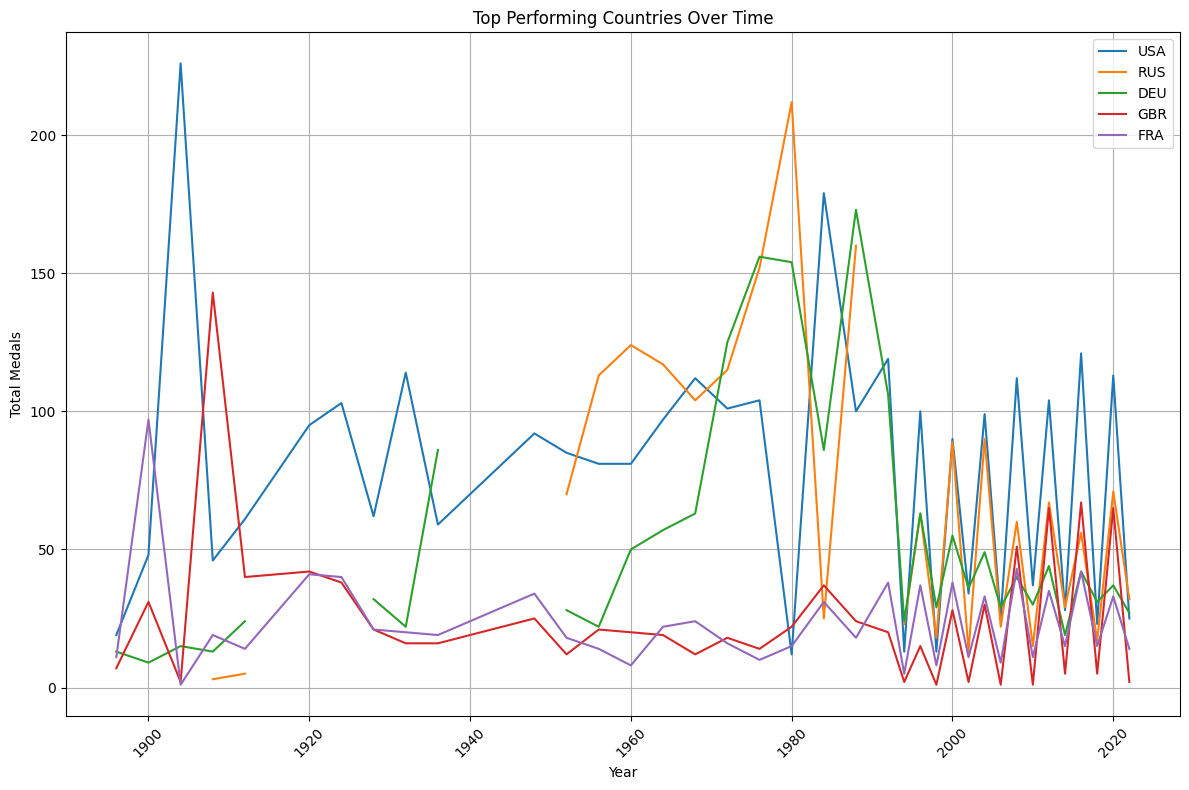

In [54]:
plt.figure(figsize=(12, 8))
for country in top_countries_df.columns:
    plt.plot(top_countries_df.index, top_countries_df[country], label=country)

plt.title('Top Performing Countries Over Time')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

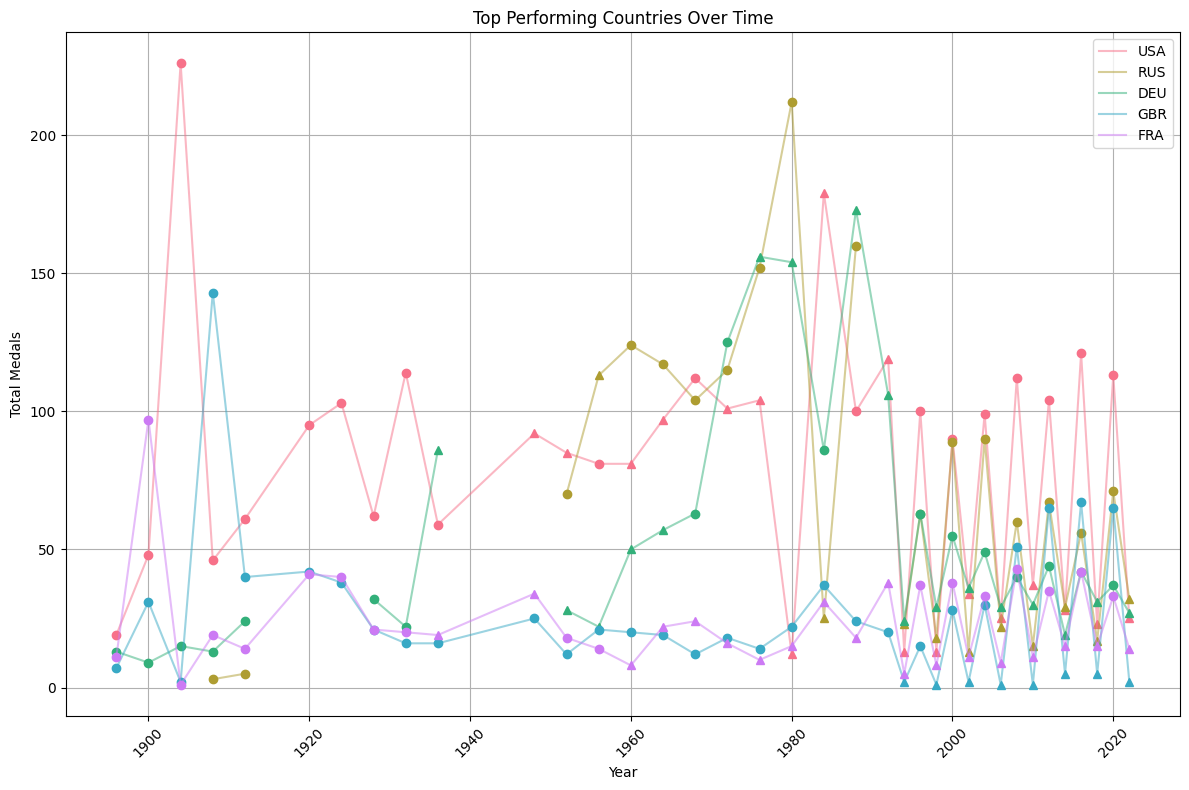

In [65]:
plt.figure(figsize=(12, 8))

colors = sns.color_palette('husl', n_colors=len(top_countries_df.columns))

legend_handles = [] 
for i, country in enumerate(top_countries_df.columns):
    country_color = colors[i]
    country_label = f'{country}' 
    for year in top_countries_df.index:
        filtered_medals = combined_df[(combined_df['country_3_letter_code'] == country) & (combined_df['game_year'] == year)]
        
        if not filtered_medals.empty:
            game_season = filtered_medals['game_season'].iloc[0]
            
            if game_season == 'Summer':
                marker = 'o'
            elif game_season == 'Winter':
                marker = '^'

        
            plt.plot(year, top_countries_df.loc[year, country], marker=marker, color=country_color, linestyle='None')
    
    line, = plt.plot(top_countries_df.index, top_countries_df[country], linestyle='-', color=country_color, alpha=0.5)
    
    legend_handles.append(line)

plt.legend(legend_handles, top_countries_df.columns, loc='upper right')

plt.title('Top Performing Countries Over Time')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()